# Yelp API - Lab

The previously deployed lab on working around building a GIS with Yelp API and Folium can be found [here](https://github.com/learn-co-curriculum/dsc-2-15-10-yelp-api-gis-lab/tree/a56358c2d0c2daf569a5f50937c4c27463aadb1a) (not relevant for new students).


## Introduction 

Now that we've seen how the Yelp API works, and some basic Folium visualizations its time to put those skills to work in order to create a working map! Taking things a step further, you'll also independently explore how to perform pagination in order to retrieve a full results set from the Yelp API!

## Objectives

You will be able to: 
* Create HTTP requests to get data from Yelp API
* Parse HTTP responses and perform data analysis on the data returned
* Perform pagination to retrieve troves of data!
* Create a simple geographical system on to view information about selected businesses, at a given location. 

## Problem Introduction

You've now worked with some API calls, but we have yet to see how to retrieve a more complete dataset in a programmatic manner. Returning to the Yelp API, the [documentation](https://www.yelp.com/developers/documentation/v3/business_search) also provides us details regarding the API limits. These often include details about the number of requests a user is allowed to make within a specified time limit and the maximum number of results to be returned. In this case, we are told that any request has a maximum of 50 results per request and defaults to 20. Furthermore, any search will be limited to a total of 1000 results. To retrieve all 1000 of these results, we would have to page through the results piece by piece, retriving 50 at a time. Processes such as these are often refered to as pagination.

In this lab, you will define a search and then paginate over the results to retrieve all of the results. You'll then parse these responses as a DataFrame (for further exploration) and create a map using Folium to visualize the results geographically.

## Part I - Make the Initial Request

Start by making an initial request to the Yelp API. Your search must include at least 2 parameters: **term** and **location**. For example, you might search for pizza restaurants in NYC. The term and location is up to you, but make the request below.

In [1]:
# import libraries
import requests
import pandas as pd

# Set API key
API_Key = '5C0vj7mJoEvd1reVN6EdJ_9fw4_JsrX4ZpOituzfx7qudTVg8h9xq9Dhdm3fUPThlyaFTjW0eeTLSm0CXYiLgudZpctnnvE6TIIXoyJszLmbCibGWXUI2xW48aVkXHYx'
# Set URL and Header
base_url = 'https://api.yelp.com/v3/businesses/search'
headers = {'Authorization':'Bearer {}'.format(API_Key)}

# Make Params
params = {'location':'NYC',
          'term':'Indian'}

response = requests.get(base_url, headers = headers, params = params)
out = response.json()

## Pagination

Now that you have an initial response, you can examine the contents of the json container. For example, you might start with ```response.josn().keys()```. Here, you'll see a key for `'total'`, which tells you the full number of matching results given your query parameters. Write a loop (or ideally a function) which then makes successive API calls using the offset parameter to retrieve all of the results (or 5000 for a particularly large result set) for the original query. As you do this, be mindful of how you store the data. Your final goal will be to reformat the data concerning the businesses themselves into a pandas DataFrame from the json objects.

**Note: be mindful of the API rate limits. You can only make 5000 requests per day, and are also can make requests too fast. Start prototyping small before running a loop that could be faulty. You can also use time.sleep(n) to add delays. For more details see https://www.yelp.com/developers/documentation/v3/rate_limiting.**

In [2]:
import time
# set parameters
location = 'NYC'
term = 'Indian'
limit = 50
params = {'location':location,
            'term':term,
            'limit':limit,
            'offset':0}

# Find total number of entries
response = requests.get(base_url, headers = headers, params = params)
out = response.json()
total = out['total']
if total > 1000:
    total = 1000 # Can't return more than 1000 businesses

# instantiate empty list to store results, then loop to get results
businesses = []
for offset in range(0,total,50):
    params['offset'] = offset
    response = requests.get(base_url, headers = headers, params = params)
    out = response.json()
    if 'error' in out.keys():
        print(out)
        break
    businesses.extend(out['businesses'])
    time.sleep(0.5)# Slows down the request rate to prevent error
    
indian_restaurants = pd.DataFrame(businesses)

In [3]:
indian_restaurants.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,the-masalawala-new-york-2,"[{'alias': 'indpak', 'title': 'Indian'}, {'ali...","{'latitude': 40.72191, 'longitude': -73.98666}",(212) 358-9300,1941.690758,sCC7-hSdCkNPExejZT9BAQ,https://s3-media4.fl.yelpcdn.com/bphoto/4fxSLo...,False,"{'address1': '179 Essex St', 'address2': '', '...",The MasalaWala,+12123589300,$$,4.5,1296,"[restaurant_reservation, delivery, pickup]",https://www.yelp.com/biz/the-masalawala-new-yo...
1,bengal-tiger-indian-food-new-york,"[{'alias': 'indpak', 'title': 'Indian'}]","{'latitude': 40.763167, 'longitude': -73.977131}",(212) 265-2703,6579.278643,x0k5kFArHLijdY8-NEQ7Xg,https://s3-media1.fl.yelpcdn.com/bphoto/skrQkD...,False,"{'address1': '58 W 56th St', 'address2': 'Fl 2...",Bengal Tiger Indian Food,+12122652703,$$,4.5,1423,"[delivery, pickup]",https://www.yelp.com/biz/bengal-tiger-indian-f...
2,angaar-new-york-2,"[{'alias': 'indpak', 'title': 'Indian'}]","{'latitude': 40.7782, 'longitude': -73.97802}",(212) 393-4040,8211.459142,eTzH9lmkmouNlmuJ77i8Ow,https://s3-media3.fl.yelpcdn.com/bphoto/iEhemI...,False,"{'address1': '283 Columbus Ave', 'address2': '...",Angaar,+12123934040,NaN,4.5,21,"[delivery, pickup]",https://www.yelp.com/biz/angaar-new-york-2?adj...
3,tikka-indian-grill-brooklyn-2,"[{'alias': 'indpak', 'title': 'Indian'}]","{'latitude': 40.71441, 'longitude': -73.96078}",(718) 768-2262,2998.452269,WWpOWqOgS9ClYvxYVzR0lg,https://s3-media3.fl.yelpcdn.com/bphoto/jZdiyq...,False,"{'address1': '185 Grand St', 'address2': '', '...",Tikka Indian Grill,+17187682262,$$,4.5,267,"[delivery, pickup]",https://www.yelp.com/biz/tikka-indian-grill-br...
4,seva-indian-cuisine-astoria-5,"[{'alias': 'indpak', 'title': 'Indian'}]","{'latitude': 40.7653633, 'longitude': -73.9191...",(718) 626-4440,9206.478614,lxNU-aBq0yPwBDx-i89ahA,https://s3-media4.fl.yelpcdn.com/bphoto/MsQyig...,False,"{'address1': '3007 34th St', 'address2': '', '...",Seva Indian Cuisine,+17186264440,$$,4.5,1104,"[delivery, pickup]",https://www.yelp.com/biz/seva-indian-cuisine-a...


In [4]:
indian_restaurants['lat'] = indian_restaurants.\
                            coordinates.map(lambda x: x['latitude'])
indian_restaurants['lon'] = indian_restaurants.\
                            coordinates.map(lambda x: x['longitude'])
for kind in ['delivery', 'pickup','restaurant_reservation']:
    indian_restaurants[kind] = indian_restaurants.transactions.map(lambda x: kind in x)
indian_restaurants.drop(labels = ['coordinates','categories','distance','display_phone','image_url','location', 'phone','url', 'transactions'], axis = 1, inplace = True)

In [5]:
indian_restaurants.head()

,alias,id,is_closed,name,price,rating,review_count,lat,lon,delivery,pickup,restaurant_reservation
0,the-masalawala-new-york-2,sCC7-hSdCkNPExejZT9BAQ,False,The MasalaWala,$$,4.5,1296,40.721910,-73.986660,True,True,True
1,bengal-tiger-indian-food-new-york,x0k5kFArHLijdY8-NEQ7Xg,False,Bengal Tiger Indian Food,$$,4.5,1423,40.763167,-73.977131,True,True,False
2,angaar-new-york-2,eTzH9lmkmouNlmuJ77i8Ow,False,Angaar,NaN,4.5,21,40.778200,-73.978020,True,True,False
3,tikka-indian-grill-brooklyn-2,WWpOWqOgS9ClYvxYVzR0lg,False,Tikka Indian Grill,$$,4.5,267,40.714410,-73.960780,True,True,False
4,seva-indian-cuisine-astoria-5,lxNU-aBq0yPwBDx-i89ahA,False,Seva Indian Cuisine,$$,4.5,1104,40.765363,-73.919101,True,True,False


## Exploratory Analysis

Take the restaurants from the previous question and do an intial exploratory analysis. At minimum, this should include looking at the distribution of features such as price, rating and number of reviews as well as the relations between these dimensions.

In [6]:
indian_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
alias                     1000 non-null object
id                        1000 non-null object
is_closed                 1000 non-null bool
name                      1000 non-null object
price                     846 non-null object
rating                    1000 non-null float64
review_count              1000 non-null int64
lat                       1000 non-null float64
lon                       1000 non-null float64
delivery                  1000 non-null bool
pickup                    1000 non-null bool
restaurant_reservation    1000 non-null bool
dtypes: bool(4), float64(3), int64(1), object(4)
memory usage: 66.5+ KB


In [7]:
indian_restaurants.price = indian_restaurants.\
                            price.fillna(value = '').str.len()

In [8]:
indian_restaurants.price.hist();

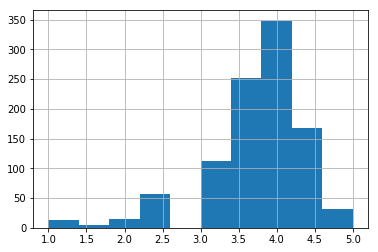

In [9]:
indian_restaurants.rating.hist()

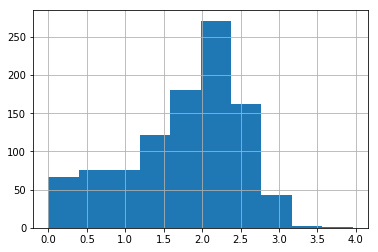

In [10]:
import numpy as np
indian_restaurants.review_count.apply(np.log10).hist()

## Mapping

Look at the initial Yelp example and try and make a map using Folium of the restaurants you retrieved. Be sure to also add popups to the markers giving some basic information such as name, rating and price.

In [24]:
indian_restaurants['restaurant_name'] = indian_restaurants.name

In [25]:
for i,row in indian_restaurants.iterrows():
    print(row.restaurant_name)

The MasalaWala
Bengal Tiger Indian Food
Angaar
Tikka Indian Grill
Seva Indian Cuisine
Mughlai Indian Cuisine
Aahar Indian Cuisine
Indian Accent
Indian Spice
Mughlai Grill
Tamarind
Benares
Malai Marke Indian Cuisine
Mahal Kita
Pippali
Namaste
Indian Table
Kitchen Grill Indian Restaurant
Bombay Grill
Yaar Indian Restaurant
Dhaba Indian Cuisine
Ayna Agra Indian Restaurant
Rahi
Gandhi Fine Indian Cuisine
Nimbooda
Aaheli Indian Cuisine
Mint Masala
Taj Mahal Indian Restaurant
Rangoli Exquisite Indian Cuisine
Mughlai Indian Cuisine
Ashoka Indian Restaurant
The Drunken Munkey - UES
Spice & Grill
Masala Grill
India's Curry
India Kitchen
Bombay Grill
Desi Grill
The Drunken Munkey - West Village
Kurry Qulture
Bombay Kabab
Masala Times
Corner Delhi
Delhi Masala
Joy Indian Restaurant
Raj's Indian Kitchen
Tandoori Masala
Mumbai Masala
indikitch
Samudra Vegetarian Restaurant & Chaat House
Indian Project
All About Indian Food
Kanan Indian Restaurant
Diwan Grill Indian Cuisine
Clove Indian Restaurant &

Ginger House
Gyro King
Dimple's Bombay Talk
Upi Jaya
Urban Spice
Nio's Trinidad Roti Shop
Daawat Restaurant
Junooon
Karahi Restaurant and Grill
Jassi's Fine Indian Cuisine
Quantum Leap
Jacob Restaurant
The Oneness-Fountain-Heart
Amali
Jujube Tree
Mumbai Spices
Beyond Sushi
Chris & Sons Roti Shop and Bakery
Burgers By Honest Chops
Abir Halal Restaurant
Athidhi
The Hummus & Pita
Bar Verde
Terri
Milk + Honey
VSPOT
Usha Foods Inc
sweetgreen
Natural Bridge
Indian Diner
Taste of Mother India
Shangerila Restaurant
Pine Box Rock Shop
Wok & Grill
Vegetarian Dim Sum House
Trinidad Golden Place Restaurant
Hillside Dosa Hutt
Momos Kitchen
Spice House
Taste of Cochin
Tower of India
Hu Kitchen
Mirchi - Indian Homestyle Cuisine
Fine Buffet Indian Restaurant
The Barbecue Pit
Geo Halal Meat Cash & Carry
Original Buddha Bodai Kosher Vegetarian Restaurant
Rajni
Tabaq Restaurant & BBQ
A&A Bake and Double and Roti Shop
Dao Palate
The Panorama of My Silence-Heart
VLife
Layali Beirut Cafe Restaurant
Taiim Fa

In [27]:
#Your code here
import folium

# make map
m = folium.Map(
    location=[40.7128, -74.0060],
    zoom_start=12
)

# Load datatips into map
for _,row in indian_restaurants.iterrows():
    lat = row.lat
    lon = row.lon
    name = row.restaurant_name
    folium.Marker([lat, lon], popup='<i>{}</i>'.format(name)).add_to(m)

In [28]:
m

## Summary

Nice work! In this lab, you synthesized your skills for the day, making multiple API calls to Yelp in order to paginate through a results set, performing some basic exploratory analysis and then creating a nice map visual to display the results! Well done!